In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from coffea import hist, processor 
from coffea.hist import plot

In [2]:
hists={}
pd = []
year = '2018'
dirname = '../grinder/pods/' + year
for filename in os.listdir(dirname):
    if 'MET' in filename or 'SingleElectron' in filename or 'SinglePhoton' in filename or 'EGamma' in filename: continue
    if '.pkl.gz' in filename:
        if filename.split("____")[0] not in pd: pd.append(filename.split("____")[0])
        with gzip.open(dirname+'/'+filename) as fin:
            hin = pickle.load(fin)
            for k in hin.keys():
                if k in hists: hists[k]+=hin[k]
                else: hists[k]=hin[k]

In [3]:
pdataset = hist.Cat("pdataset", "pdataset", sorting='placement')
pdataset_cats = ("dataset",)
pdataset_map = OrderedDict()

for pdi in pd:
    pdataset_map[pdi] = (pdi+"*",)

for key in hists.keys():
    hists[key] = hists[key].group(pdataset, pdataset_cats, pdataset_map)

In [4]:
scale={}
for pdi in hists['sumw'].identifiers('pdataset'):
    scale[pdi]=hists['sumw'].project('pdataset', pdi).values(overflow='all')[()][1]
    print(pdi,scale[pdi])

for key in hists.keys():
    if key=='sumw': continue
    for pdi in hists[key].identifiers('pdataset'):
        hists[key].scale({pdi:1/scale[pdi]},axis='pdataset')

WW_TuneCP5_13TeV-pythia8 7846135.924316406
WJetsToLNu_HT-100To200_TuneCP5_13TeV-madgraphMLM-pythia8 29431645.73828125
QCD_HT200to300_TuneCP5_13TeV-madgraphMLM-pythia8 54247036.39575195
DYJetsToLL_M-50_HT-200to400_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8 11204572.71875
TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8 297176184920.0
QCD_HT700to1000_TuneCP5_13TeV-madgraphMLM-pythia8 48028221.095703125
QCD_HT100to200_TuneCP5_13TeV-madgraphMLM-pythia8 93948237.30664062
WJetsToLNu_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8 25415128.9140625
GJets_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8 19051574.2890625
WJetsToLNu_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8 5913597.69140625
QCD_HT300to500_TuneCP5_13TeV-madgraphMLM-pythia8 54594132.884765625
ZJetsToNuNu_HT-1200To2500_13TeV-madgraph 340171.00390625
GJets_HT-100To200_TuneCP5_13TeV-madgraphMLM-pythia8 9795369.33203125
ST_t-channel_antitop_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8 5109802011.3125
ST_tW_antitop_5f_inclusiveDecay

In [5]:
process = hist.Cat("process", "Process", sorting='placement')

process_cats = ("pdataset",)
process_map = OrderedDict()
#process_map["WW"] = ("WW*",)
#process_map["WZ"] = ("WZ*",)
process_map["Hbb"] = ("*HToBB*")
process_map["DY"] = ("DYJets*",)
process_map["Diboson"] = ("*_TuneCP5_13TeV-pythia8",)
process_map["ST"] = ("ST*",)
process_map["TT"] = ("TT*",)
process_map["Wjets"] = ("WJets*",)
process_map["ZJets"] = ("ZJetsToNuNu*",)
#process_map["GJets"] = ("GJets*",)
#process_map["QCD"] = ("QCD*",)

signal_cats = ("pdataset",)
signal_map = OrderedDict() ### for signal samples
signal_map["Mhs_50"] = ("*Mhs_50*",)  ## signals
signal_map["Mhs_70"] = ("*Mhs_70*",)
signal_map["Mhs_90"] = ("*Mhs_90*",)
signal_map["MonoJet"] = ("MonoJet*",)  ## signals
signal_map["MonoW"] = ("MonoW*",)    ## signals
signal_map["MonoZ"] = ("MonoZ*",)    ## signals
signal_hists = {}

for key in hists.keys():
    signal_hists[key] = hists[key].group(process, signal_cats, signal_map)
    hists[key] = hists[key].group(process, process_cats, process_map)
    print(key)

sumw
CaloMinusPfOverRecoil
recoil
mindphi
diledphi
ledphi
j1pt
j1eta
j1phi
fj1pt
fj1eta
fj1phi
njets
ndcsvL
ndflvL
ndcsvM
ndflvM
ndcsvT
ndflvT
nfjtot
nfjgood
nfjclean
fjmass
e1pt
e1eta
e1phi
dielemass
mu1pt
mu1eta
mu1phi
dimumass
probTbcq
probTbqq
probTbc
probTbq
probWcq
probWqq
probZbb
probZcc
probZqq
probHbb
probHcc
probHqqqq
probQCDbb
probQCDcc
probQCDb
probQCDc
probQCDothers
TopTagger_Raw
TopTagger_Binary
DarkHiggsTagger_Raw
DarkHiggsTagger_Raw_QCDtobb
DarkHiggsTagger_Binary
DarkHiggsTagger_Binary_QCDtobb
VvsQCDTagger
VvsQCDTagger_probZtobb
recoilVSmindphi


In [5]:
process = hist.Cat("process", "Process", sorting='placement')

process_cats = ("pdataset",)
process_map = OrderedDict()
#process_map["TT"] = ("TT*",)
process_map["Wjets"] = ("WJets*",)
process_map["ZJets"] = ("ZJetsToNuNu*",)
'''
signal_cats = ("pdataset",)
signal_map = OrderedDict() ### for signal samples
signal_map["MonoJet"] = ("MonoJet*",)  ## signals
signal_map["MonoW"] = ("MonoW*",)    ## signals
signal_map["MonoZ"] = ("MonoZ*",)    ## signals
signal_map["Mhs_50"] = ("*Mhs_50*",)  ## signals
signal_map["Mhs_70"] = ("*Mhs_70*",)
signal_map["Mhs_90"] = ("*Mhs_90*",)
signal_hists = {}
'''
for key in hists.keys():
    #signal_hists[key] = hists[key].group(process, signal_cats, signal_map)
    hists[key] = hists[key].group(process, process_cats, process_map)
    print(key)

sumw
CaloMinusPfOverRecoil
recoil
mindphi
diledphi
ledphi
j1pt
j1eta
j1phi
fj1pt
fj1eta
fj1phi
njets
ndcsvL
ndflvL
ndcsvM
ndflvM
ndcsvT
ndflvT
nfjtot
nfjgood
nfjclean
fjmass
e1pt
e1eta
e1phi
dielemass
mu1pt
mu1eta
mu1phi
dimumass
probTbcq
probTbqq
probTbc
probTbq
probWcq
probWqq
probZbb
probZcc
probZqq
probHbb
probHcc
probHqqqq
probQCDbb
probQCDcc
probQCDb
probQCDc
probQCDothers
TopAndDarkHiggsV1
TopAndDarkHiggsV2
TopAndDarkHiggsV3
TopAndDarkHiggsV4
MonoJandV
MinimalTagger
TaggerWithEverything
recoilVSmindphi


In [1]:
#TaggerKeys=['TopAndDarkHiggsV1', 'TopAndDarkHiggsV2', 'TopAndDarkHiggsV3', 'TopAndDarkHiggsV4', 'MonoJandV']
TaggerKeys=['MinimalTagger','TaggerWithEverything']

for p in signal_hists['recoil'].identifiers('process'):
    print(p,"process")
    for tagger in TaggerKeys:
        #print(tagger)
        region = 'iszeroL'
        jet_selection = 'baggy'
        print("Which tagger:",tagger)
        totalSum = np.sum(signal_hists[tagger].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[()])
        print(np.cumsum(signal_hists[tagger].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[())/totalSum)
        print()
        filename = str(p)+'_'+tagger+'.txt'
        np.savetxt(filename, np.cumsum(signal_hists[tagger].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[()])/totalSum)

NameError: name 'signal_hists' is not defined

In [8]:
#TaggerKeys=['TopAndDarkHiggsV1', 'TopAndDarkHiggsV2', 'TopAndDarkHiggsV3', 'TopAndDarkHiggsV4', 'MonoJandV']
TaggerKeys=['MinimalTagger','TaggerWithEverything']

for p in hists['recoil'].identifiers('process'):
    for tagger in TaggerKeys:
        #print(tagger)
        region = 'iszeroL'
        jet_selection = 'baggy' 
        print("Which tagger:",tagger)
        totalSum = np.sum(hists[tagger].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[()])
        print(np.cumsum(hists[tagger].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[()])/totalSum)
        print()
        filename = str(p)+'_'+tagger+'.txt'
        np.savetxt(filename,np.cumsum(hists[tagger].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[()])/totalSum)

Which tagger: MinimalTagger
[0.         0.09766606 0.14288274 0.17737359 0.20193214 0.22448965
 0.2451278  0.26459265 0.28107377 0.29783792 0.31508836 0.33529072
 0.35850098 0.38887692 0.43720839 0.99916716 1.        ]

Which tagger: TaggerWithEverything
[0.         0.0244979  0.058184   0.09064846 0.11788972 0.14535954
 0.16971196 0.19518869 0.22066384 0.24974963 0.28148471 0.31591197
 0.3586269  0.41783249 0.53042492 0.9999517  1.        ]

Which tagger: MinimalTagger
[0.         0.44732938 0.58547708 0.66021705 0.70930955 0.74572242
 0.77377677 0.79699566 0.81621349 0.83383562 0.84969135 0.86506049
 0.8806721  0.90003153 0.92481987 0.99887244 1.        ]

Which tagger: TaggerWithEverything
[0.         0.14037752 0.31094639 0.43214292 0.52203205 0.59281297
 0.65211128 0.70154928 0.74260427 0.77909708 0.8118215  0.84357754
 0.87352    0.90539544 0.94072715 1.         1.        ]

Which tagger: MinimalTagger
[0.         0.46334907 0.60210889 0.67606592 0.72370603 0.75772252
 0.78402395

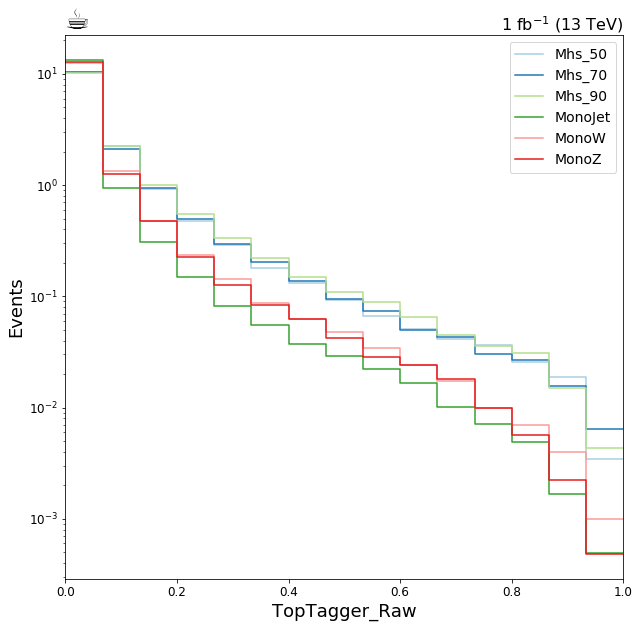

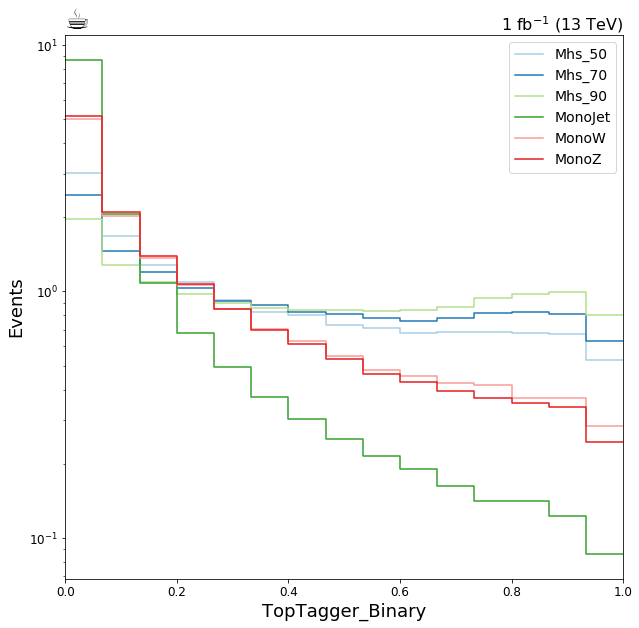

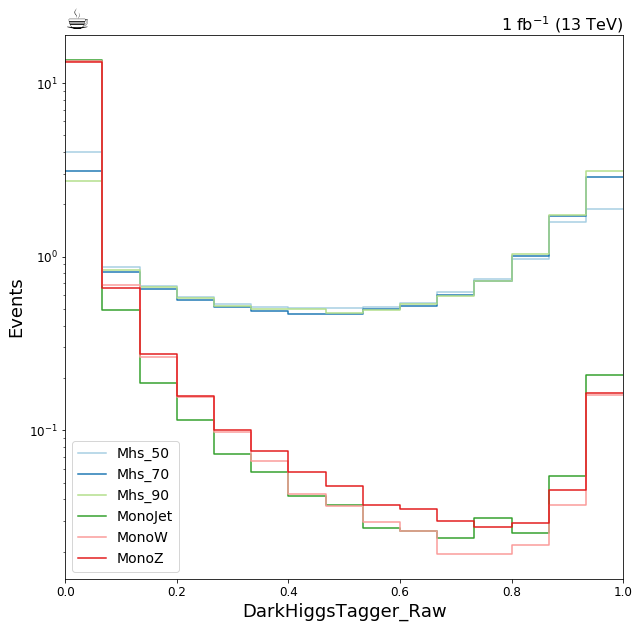

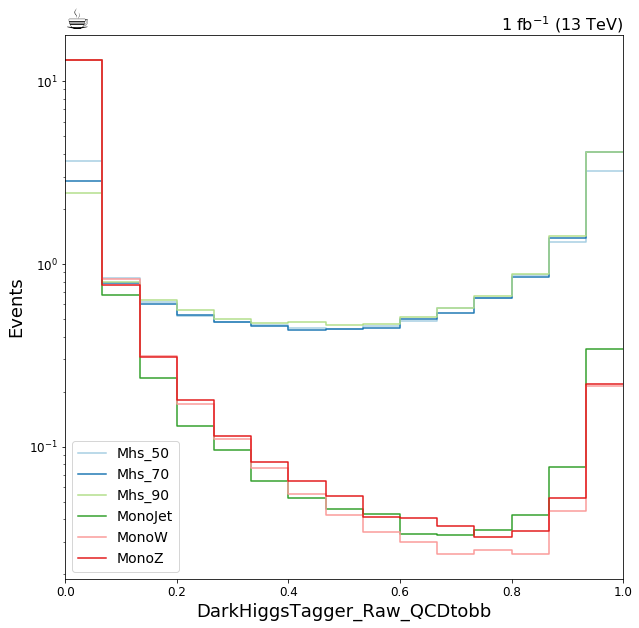

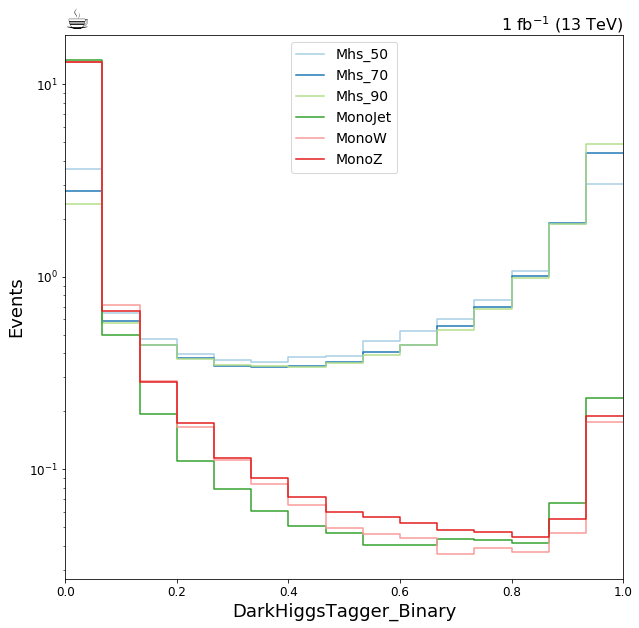

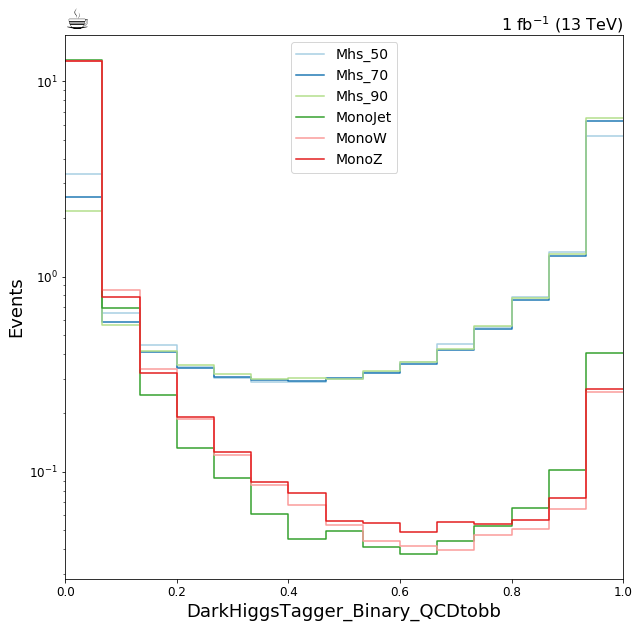

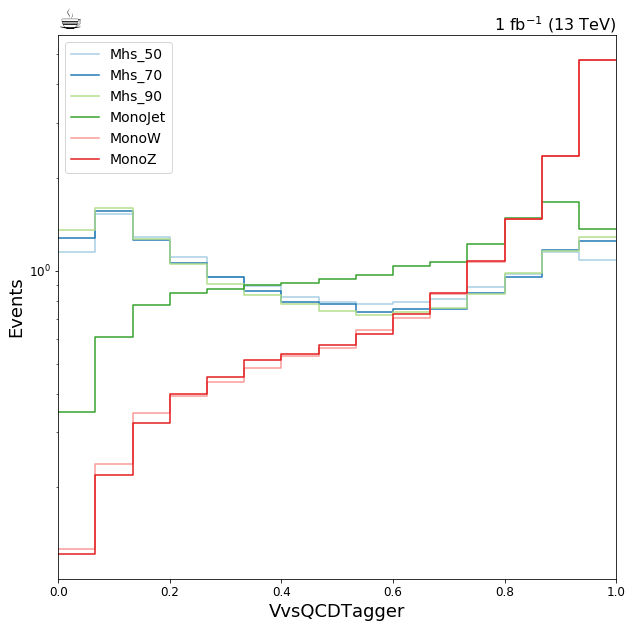

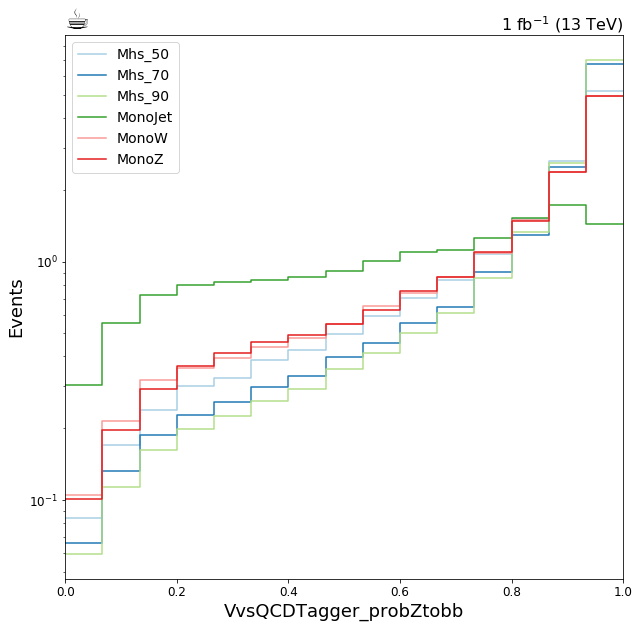

In [6]:
TaggerKeys=['TopTagger_Raw','TopTagger_Binary','DarkHiggsTagger_Raw','DarkHiggsTagger_Raw_QCDtobb',
            'DarkHiggsTagger_Binary','DarkHiggsTagger_Binary_QCDtobb','VvsQCDTagger','VvsQCDTagger_probZtobb']

from cycler import cycler

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
colors = ['#a6cee3', '#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']

if not os.path.exists('tagger'):
    os.makedirs('tagger')

for key in TaggerKeys:
    
    jet_selection='baggy'
    args = {'linestyle':'--','linewidth':2}
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(signal_hists[key].project('jet_selection',jet_selection).project('region','iszeroL'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    #ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    plot_path = os.path.abspath('tagger')
    plot_name = key+'_'+jet_selection+'.png'
    fig.savefig(os.path.join(plot_path, plot_name))

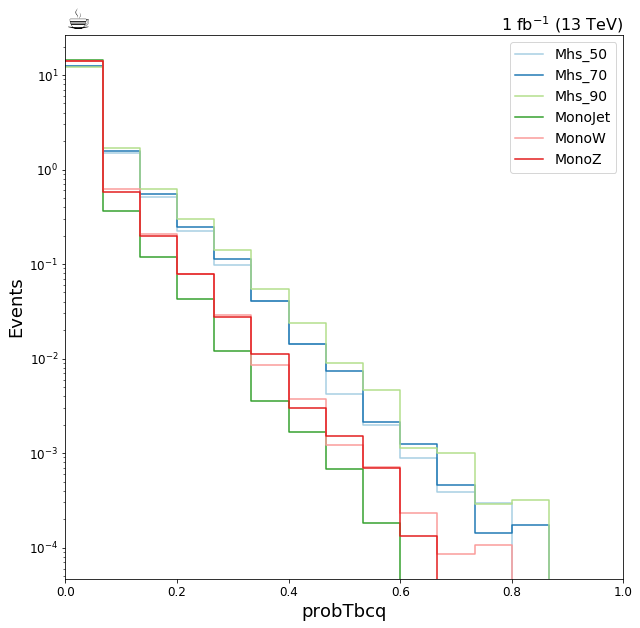

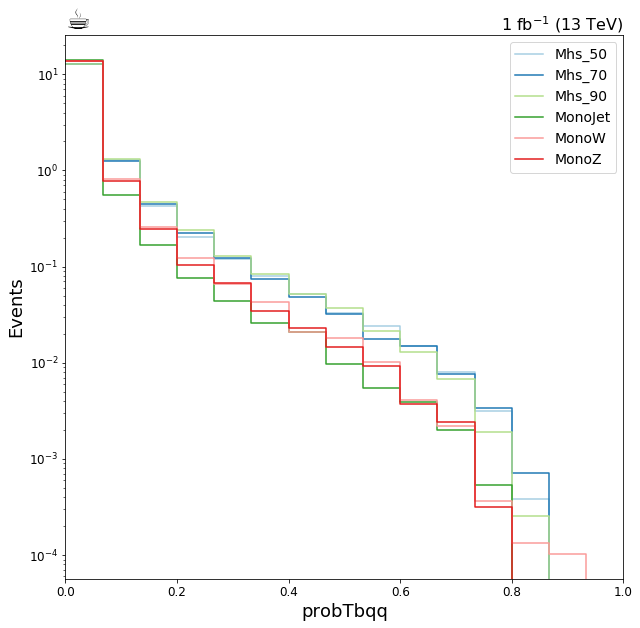

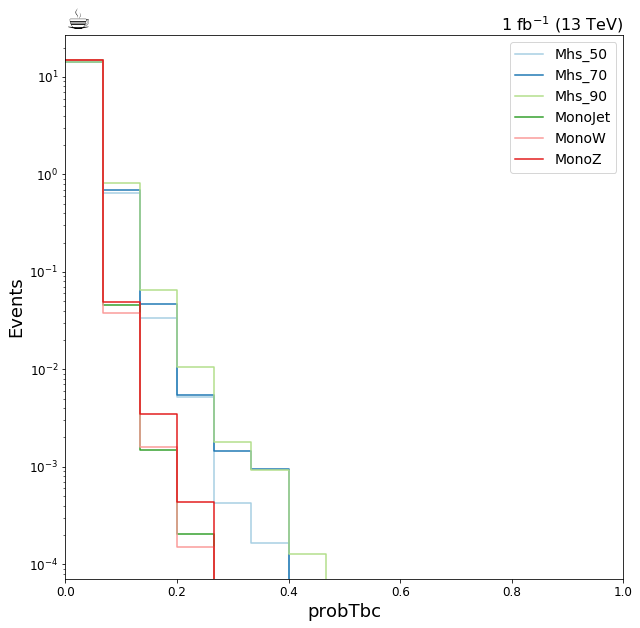

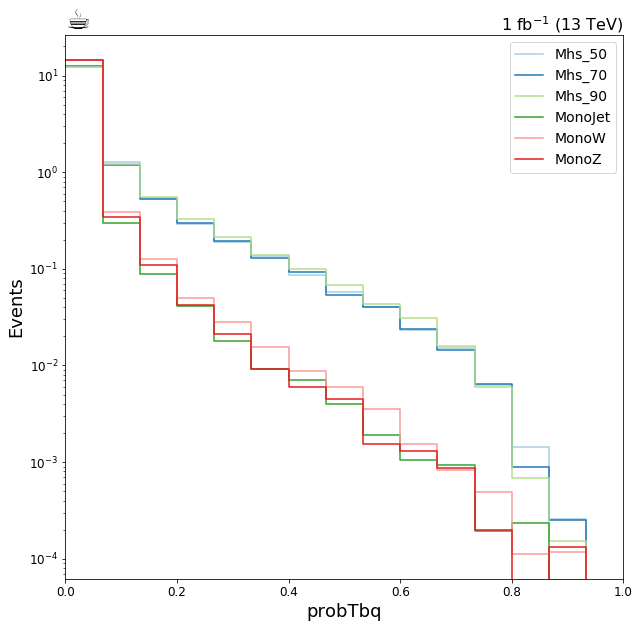

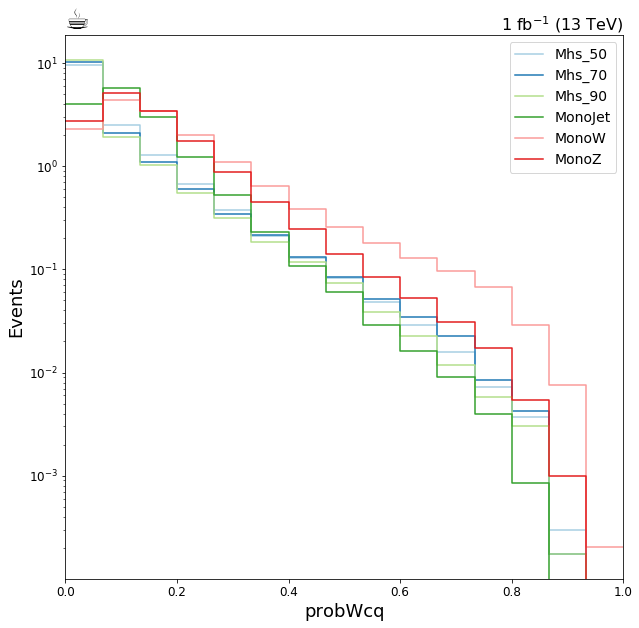

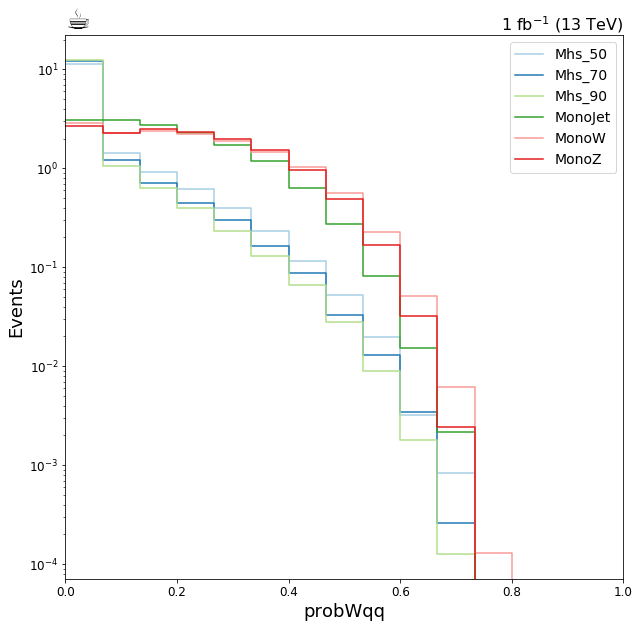

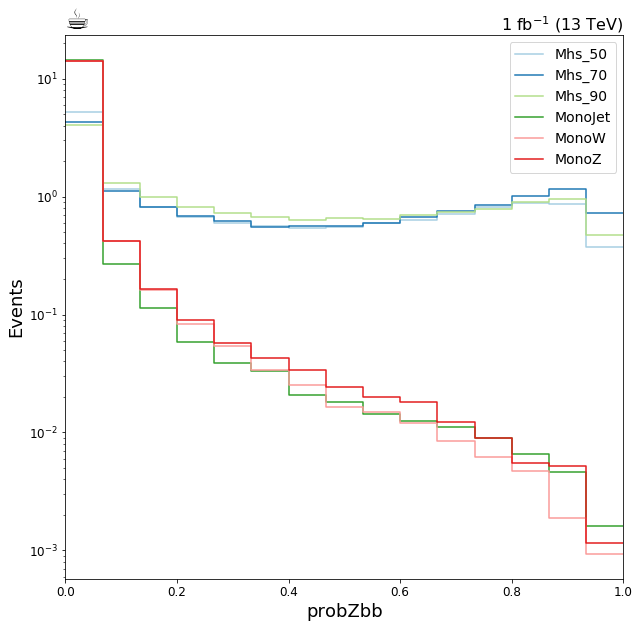

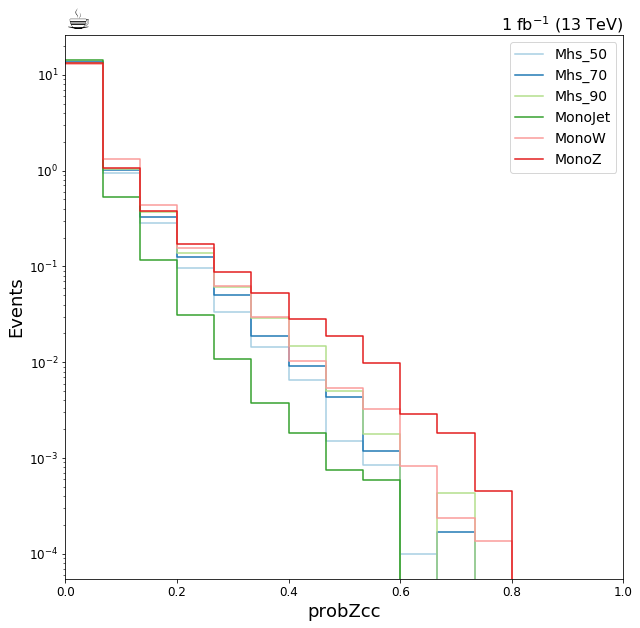

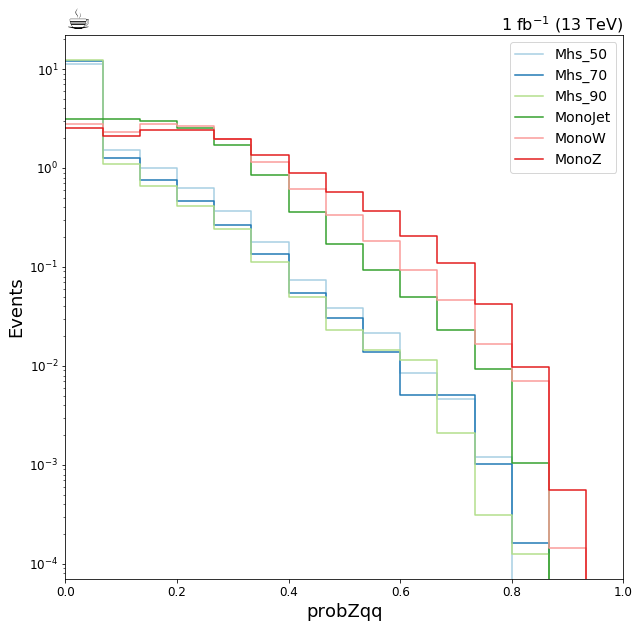

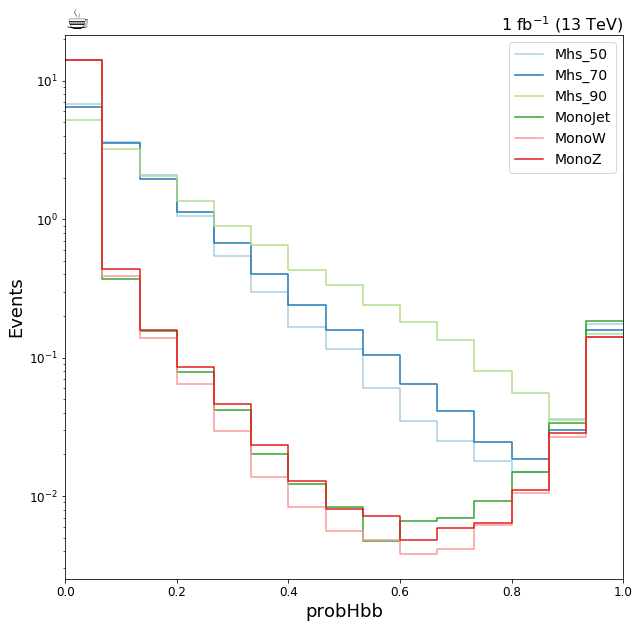

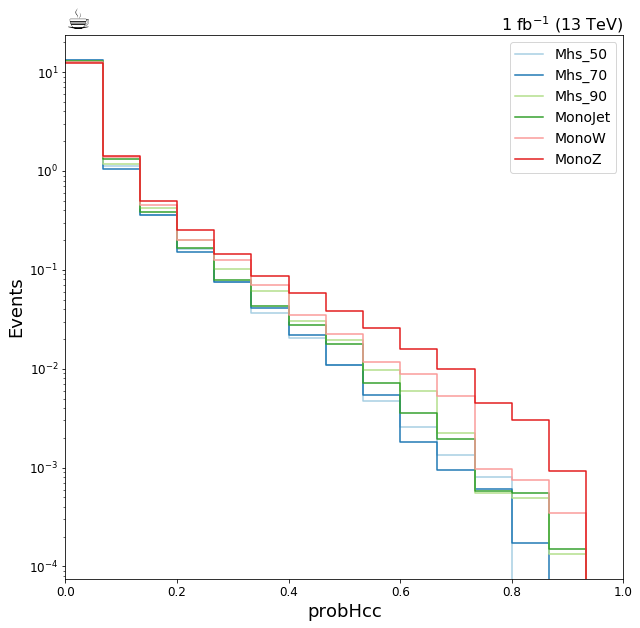

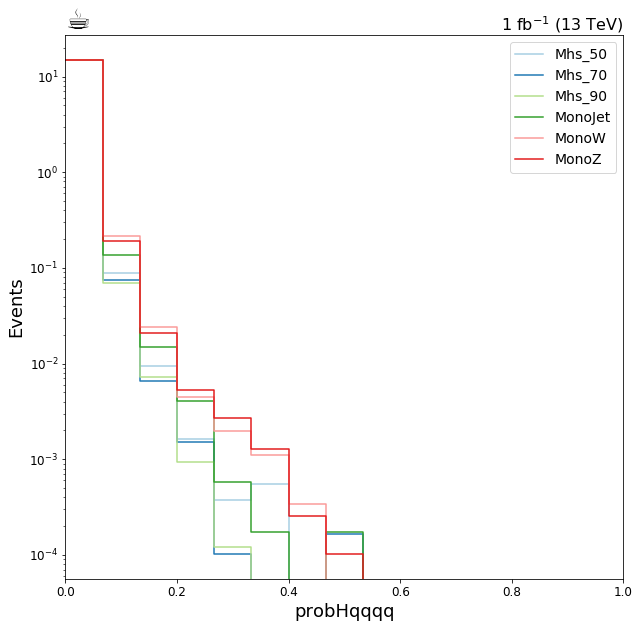

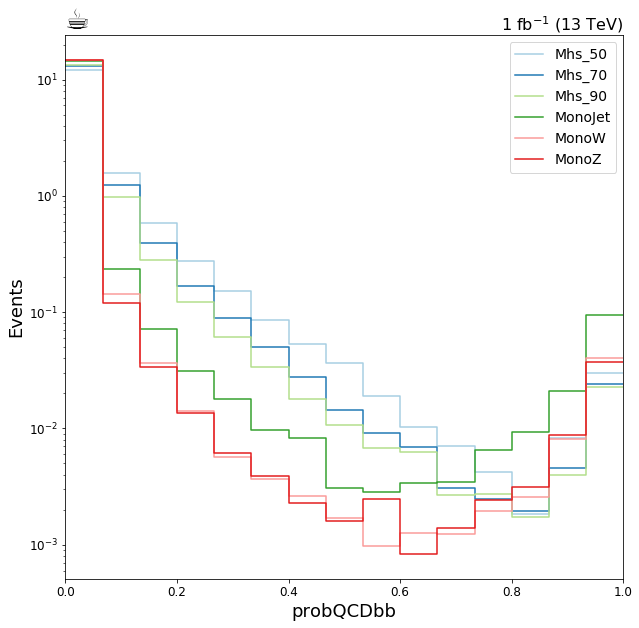

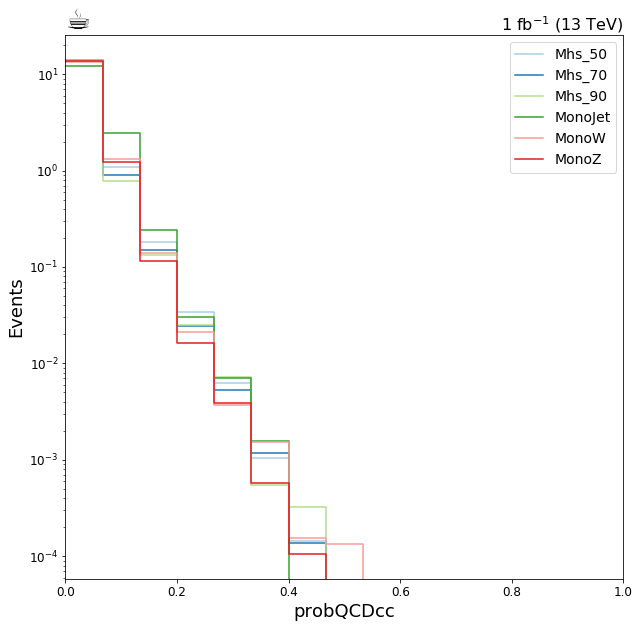

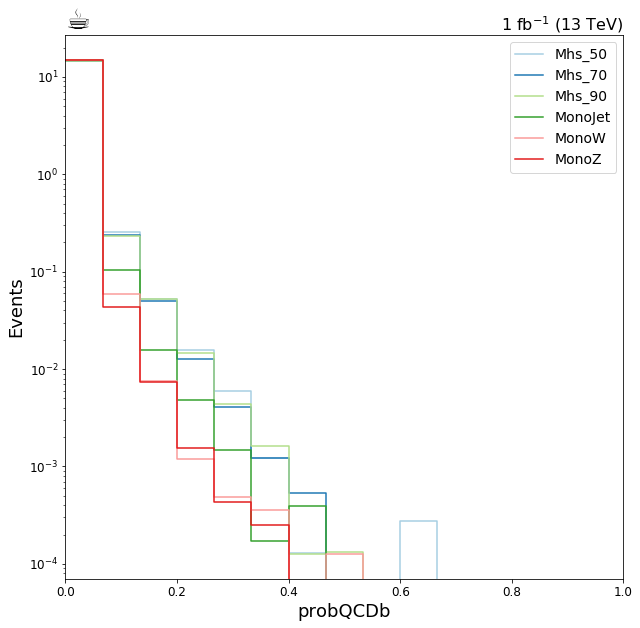

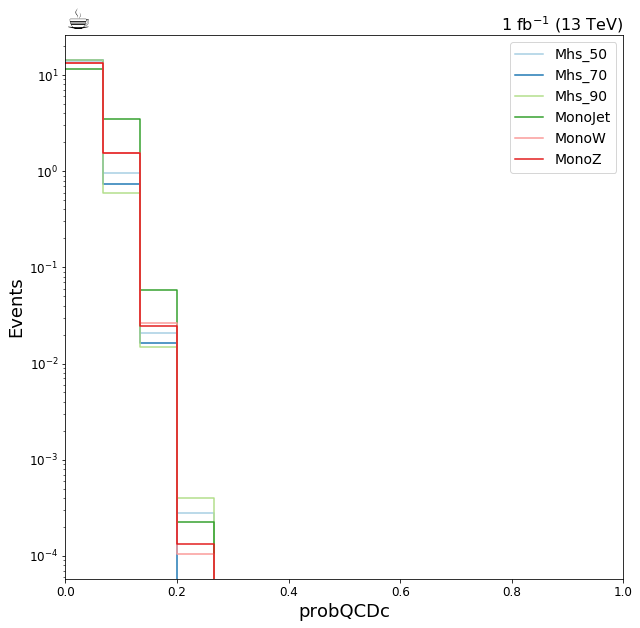

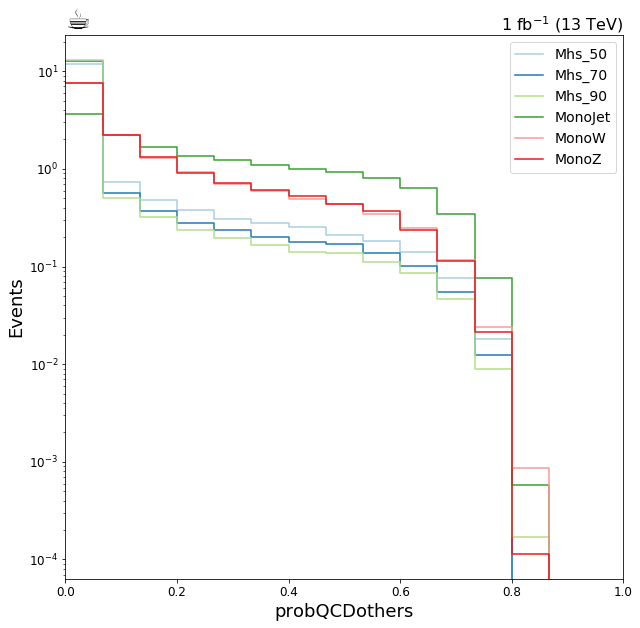

In [12]:
ChannelKeys = ['probTbcq', 'probTbqq', 'probTbc', 'probTbq',
             'probWcq', 'probWqq', 
             'probZbb', 'probZcc', 'probZqq', 
             'probHbb', 'probHcc', 'probHqqqq',
             'probQCDbb', 'probQCDcc', 'probQCDb', 'probQCDc', 'probQCDothers' ]
from cycler import cycler

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
colors = ['#a6cee3', '#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']

if not os.path.exists('tagger'):
    os.makedirs('tagger')

for key in ChannelKeys:
    
    jet_selection='baggy'
    args = {'linestyle':'--','linewidth':2}
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(signal_hists[key].project('jet_selection',jet_selection).project('region','iszeroL'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    #ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    plot_path = os.path.abspath('tagger')
    plot_name = 'sig_'+key+'_'+jet_selection+'.png'
    fig.savefig(os.path.join(plot_path, plot_name))

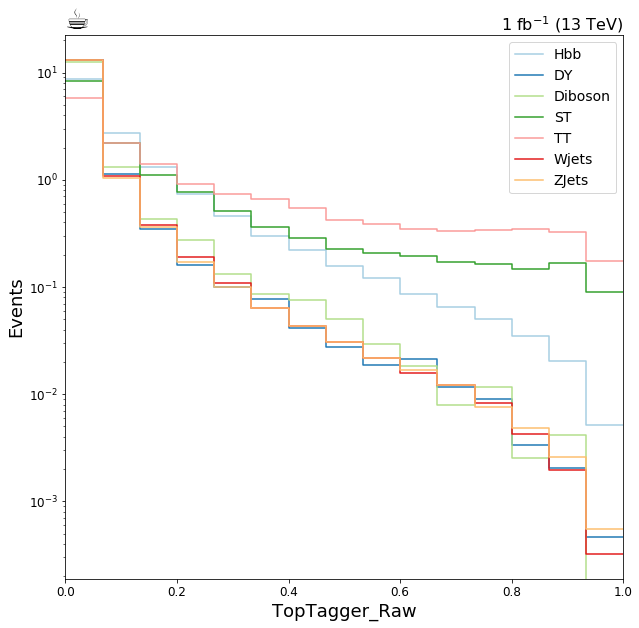

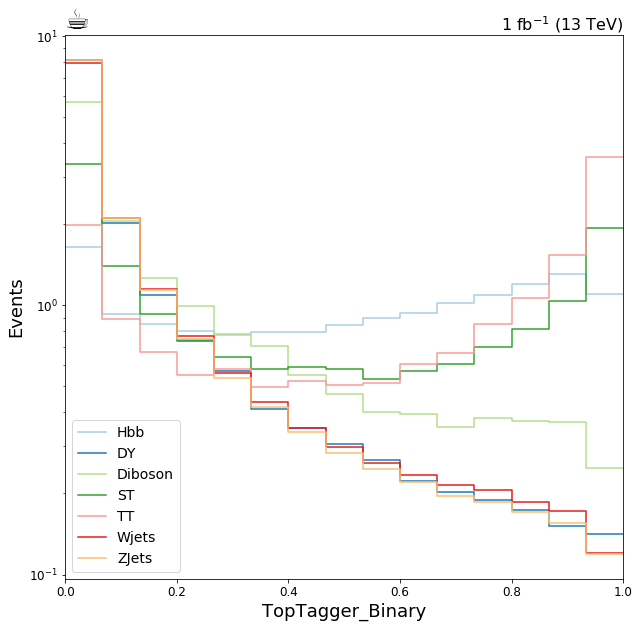

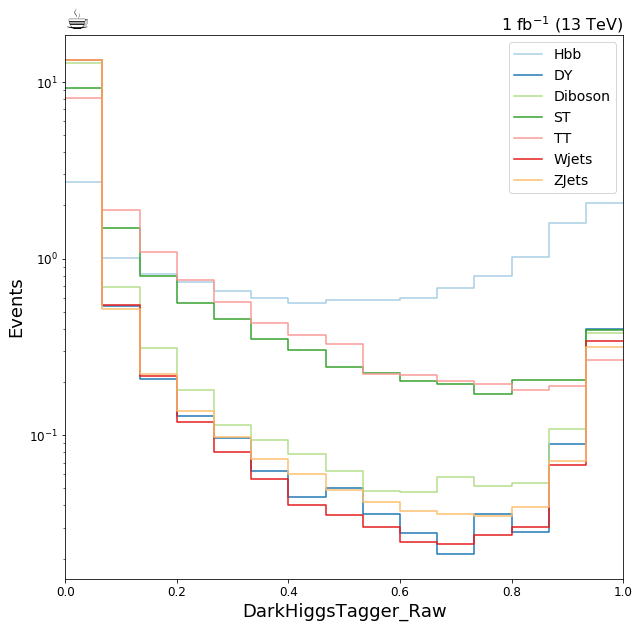

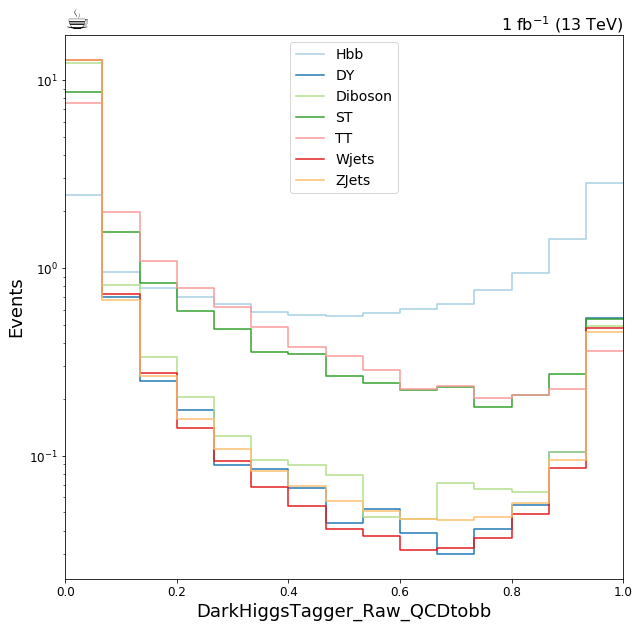

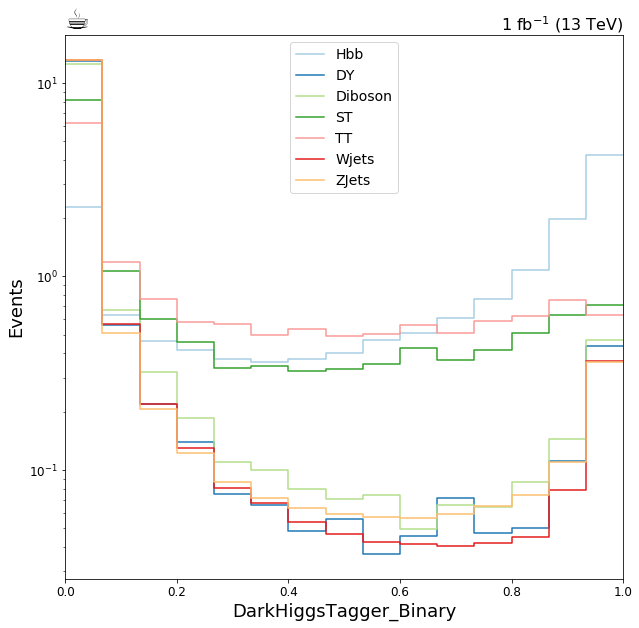

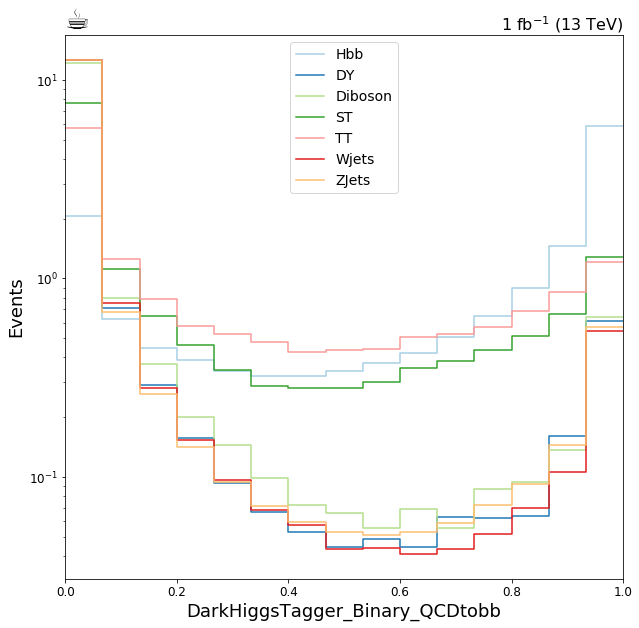

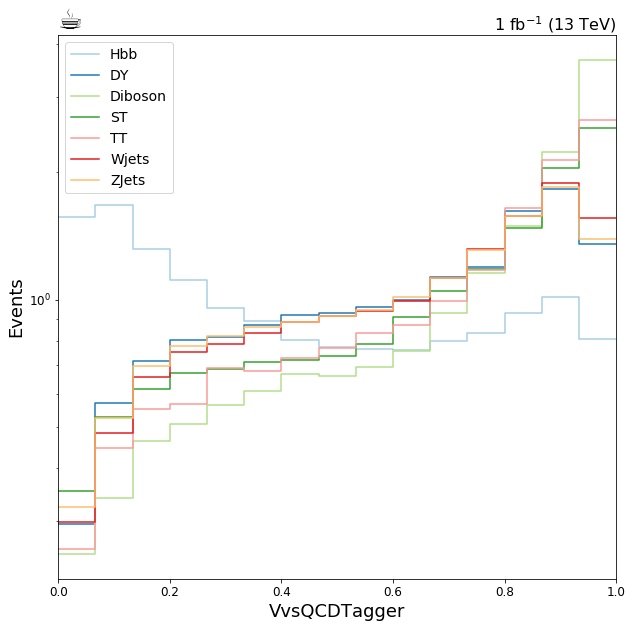

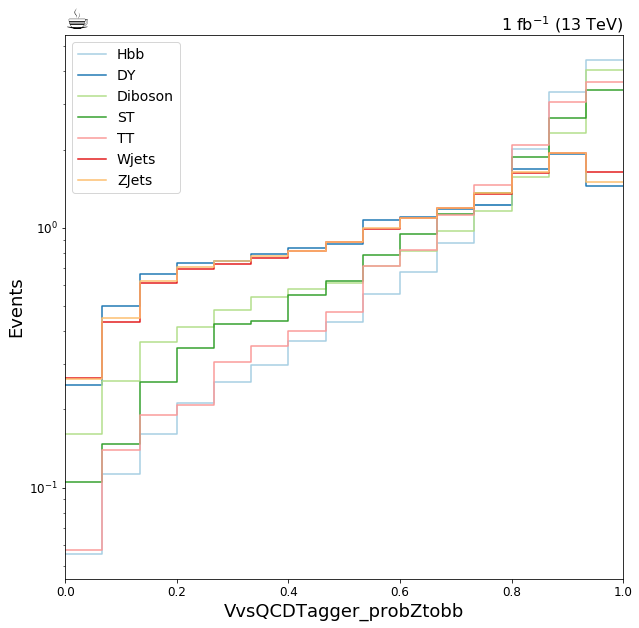

In [7]:
TaggerKeys=['TopTagger_Raw','TopTagger_Binary','DarkHiggsTagger_Raw','DarkHiggsTagger_Raw_QCDtobb',
            'DarkHiggsTagger_Binary','DarkHiggsTagger_Binary_QCDtobb','VvsQCDTagger','VvsQCDTagger_probZtobb']

from cycler import cycler

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
colors = ['#a6cee3', '#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']

if not os.path.exists('tagger'):
    os.makedirs('tagger')

for key in TaggerKeys:
    
    jet_selection='baggy'
    args = {'linestyle':'--','linewidth':2}
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(hists[key].project('jet_selection',jet_selection).project('region','iszeroL'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    #ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    plot_path = os.path.abspath('tagger')
    plot_name = 'bkg_'+key+'_'+jet_selection+'.png'
    fig.savefig(os.path.join(plot_path, plot_name))

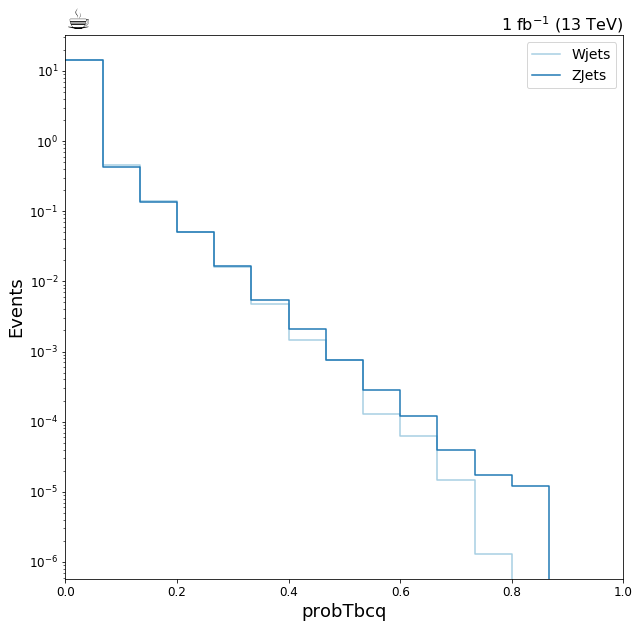

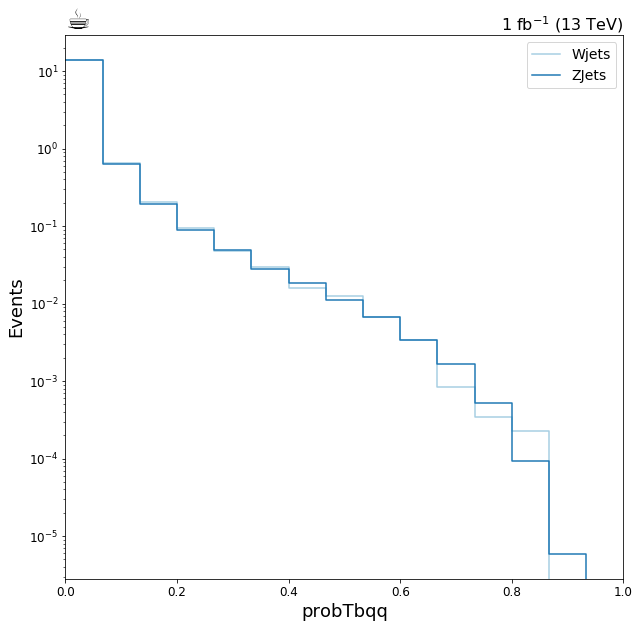

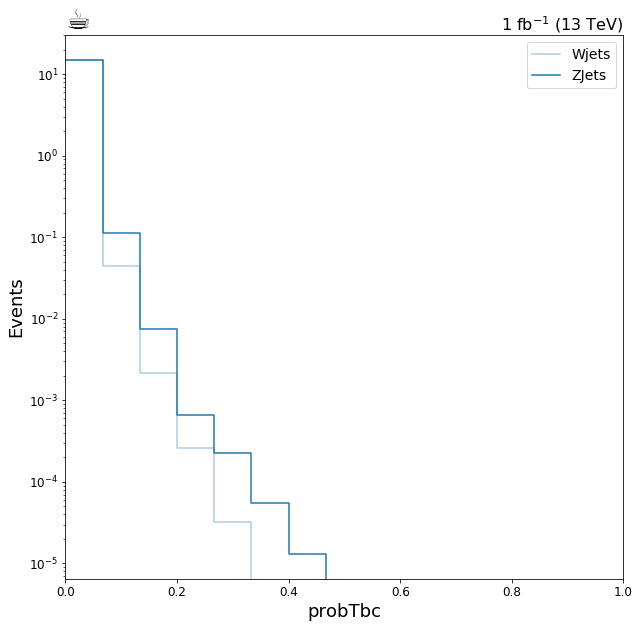

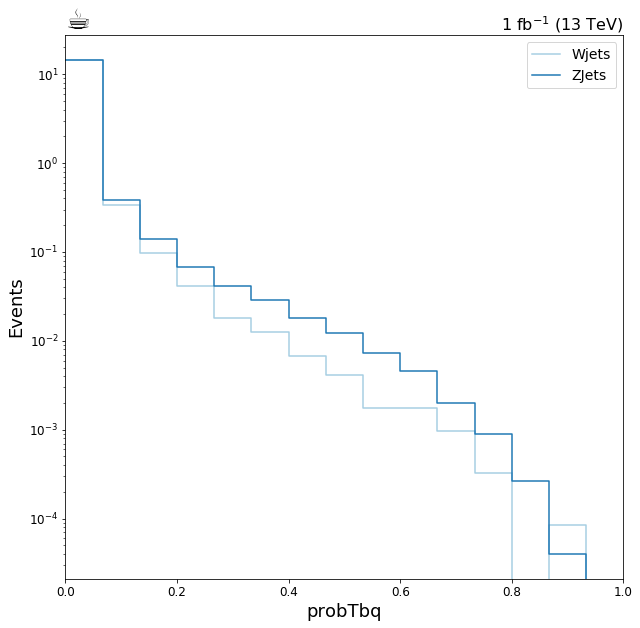

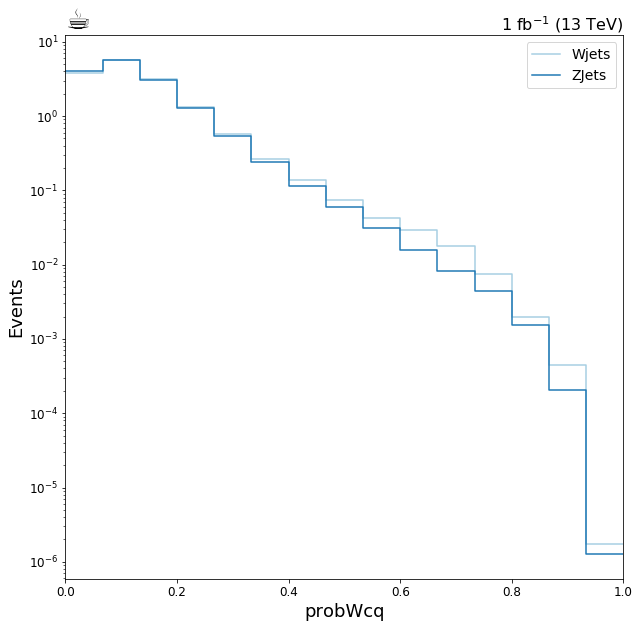

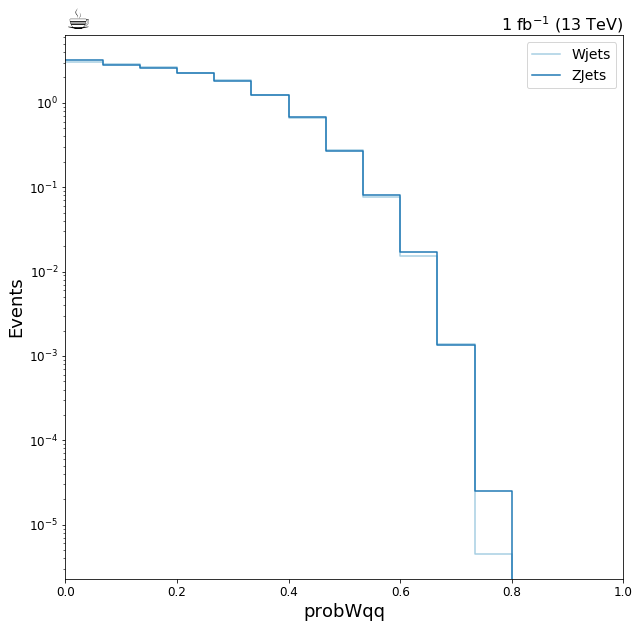

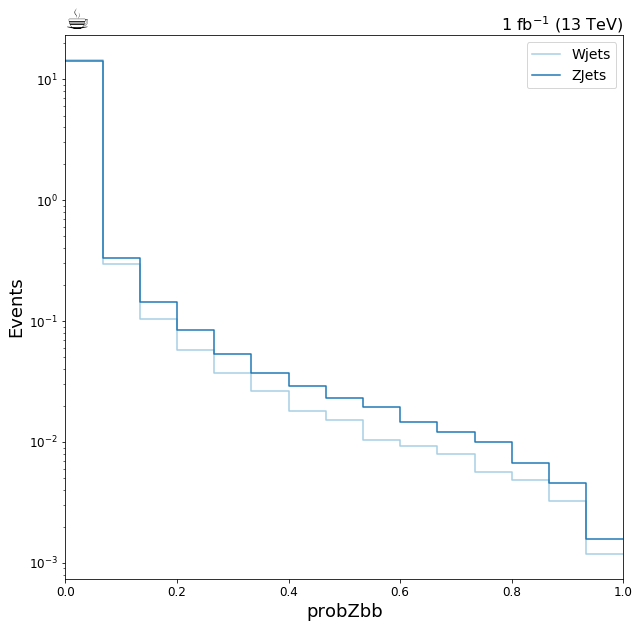

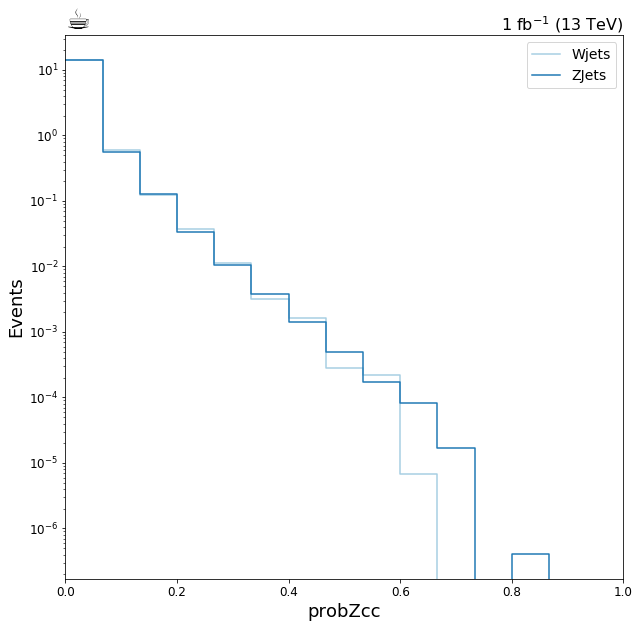

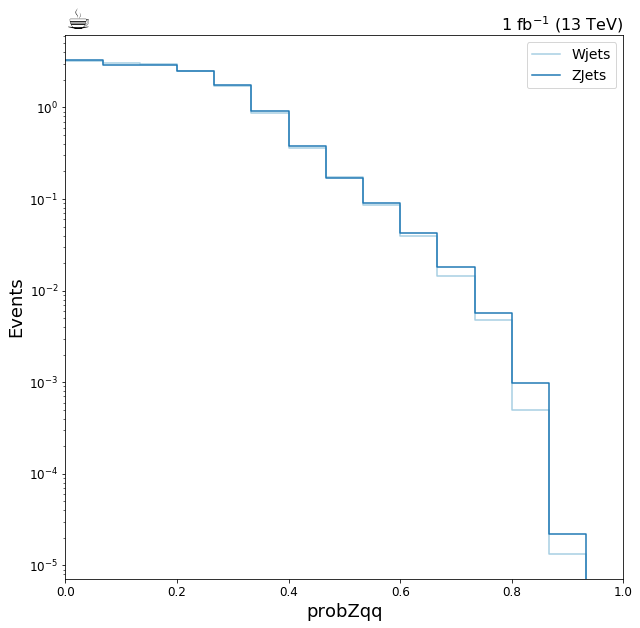

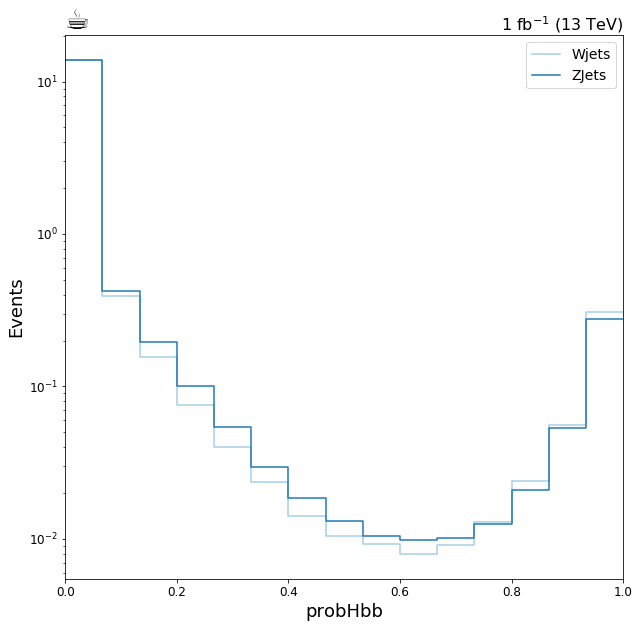

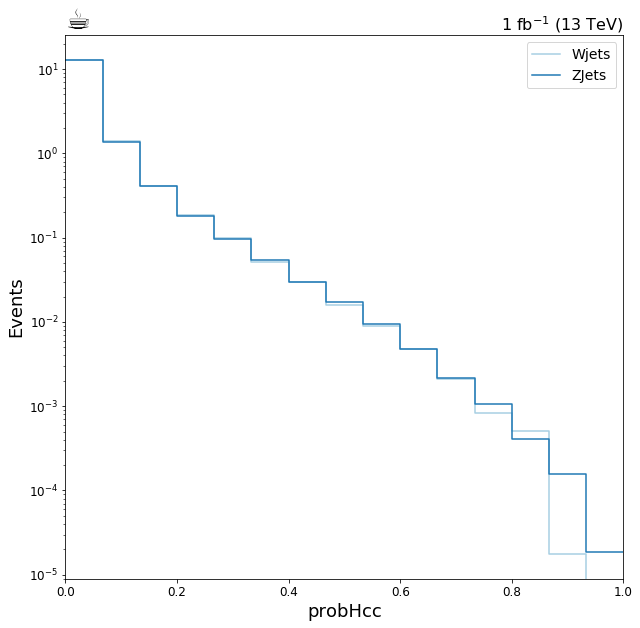

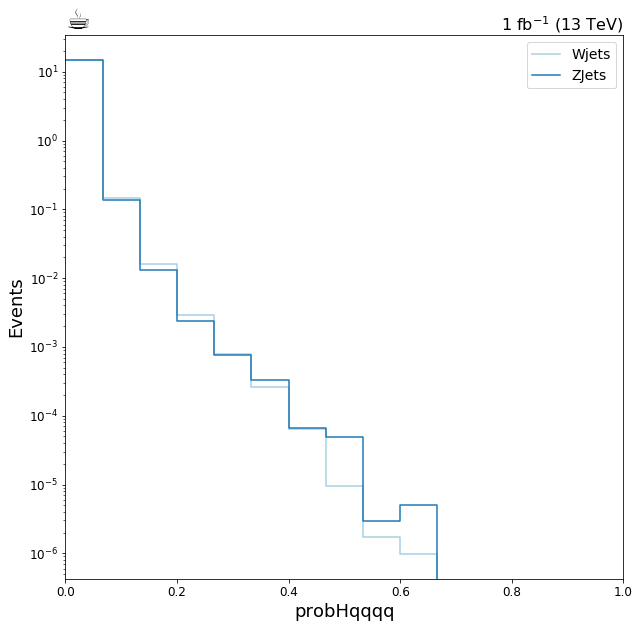

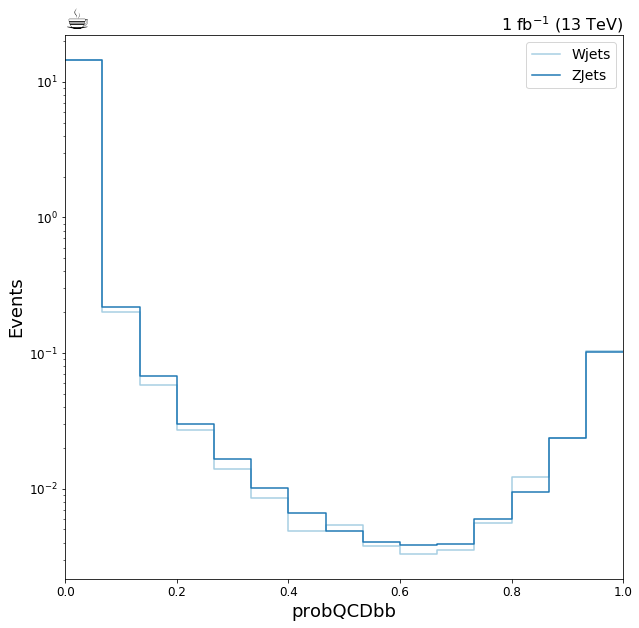

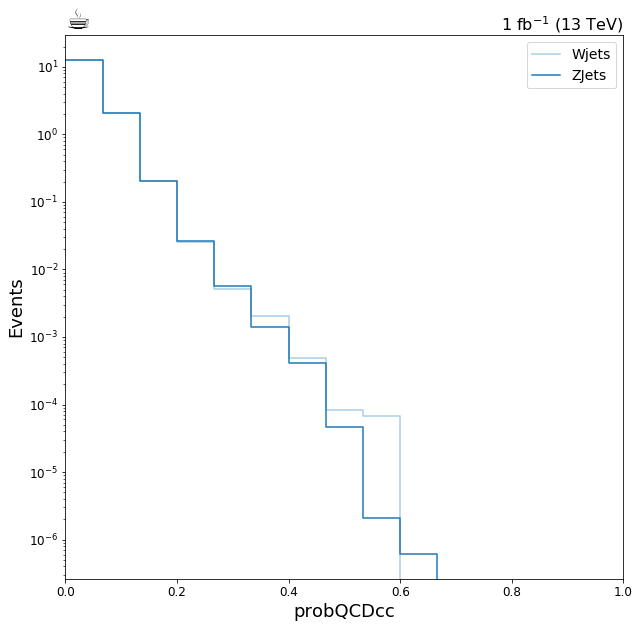

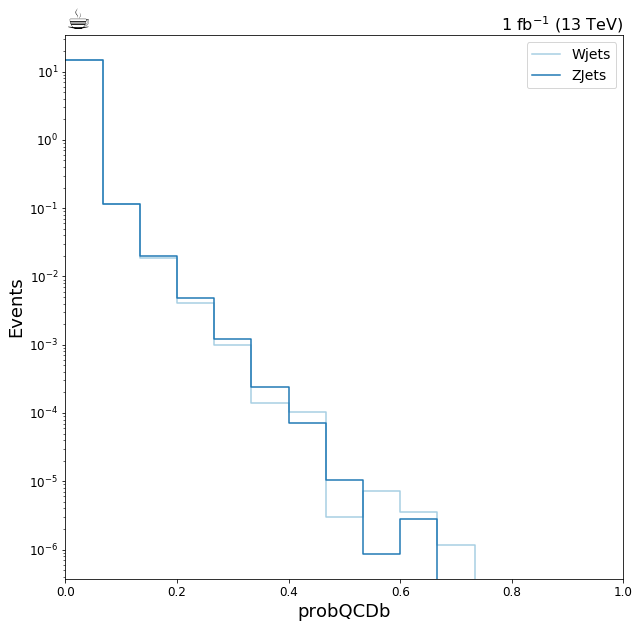

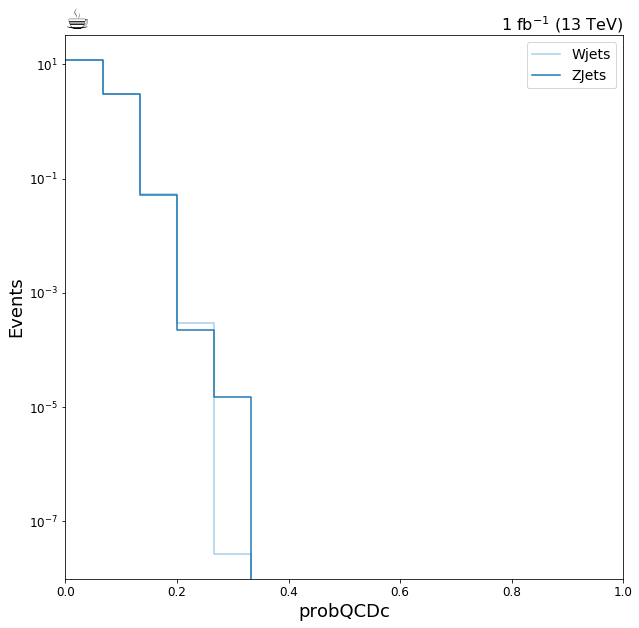

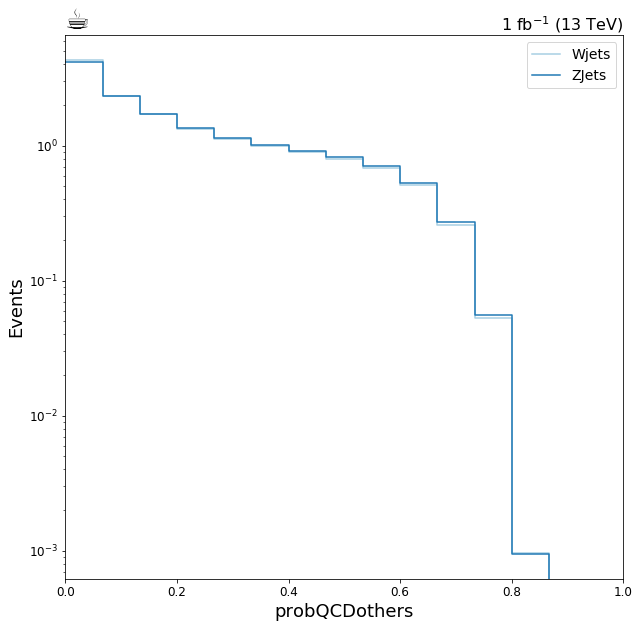

In [7]:
ChannelKeys = ['probTbcq', 'probTbqq', 'probTbc', 'probTbq',
             'probWcq', 'probWqq', 
             'probZbb', 'probZcc', 'probZqq', 
             'probHbb', 'probHcc', 'probHqqqq',
             'probQCDbb', 'probQCDcc', 'probQCDb', 'probQCDc', 'probQCDothers' ]
from cycler import cycler

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
colors = ['#a6cee3', '#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']

if not os.path.exists('tagger'):
    os.makedirs('tagger')

for key in ChannelKeys:
    
    jet_selection='baggy'
    args = {'linestyle':'--','linewidth':2}
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(hists[key].project('jet_selection',jet_selection).project('region','iszeroL'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    #ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    plot_path = os.path.abspath('tagger')
    plot_name = 'bkg_'+key+'_'+jet_selection+'.png'
    fig.savefig(os.path.join(plot_path, plot_name))

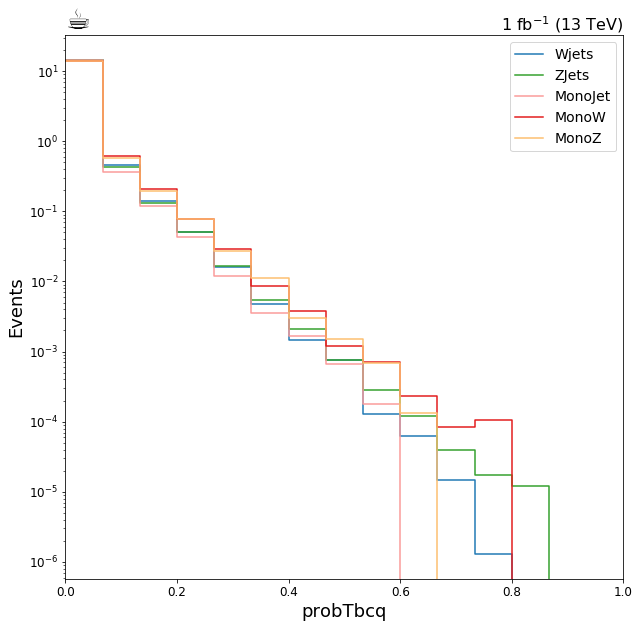

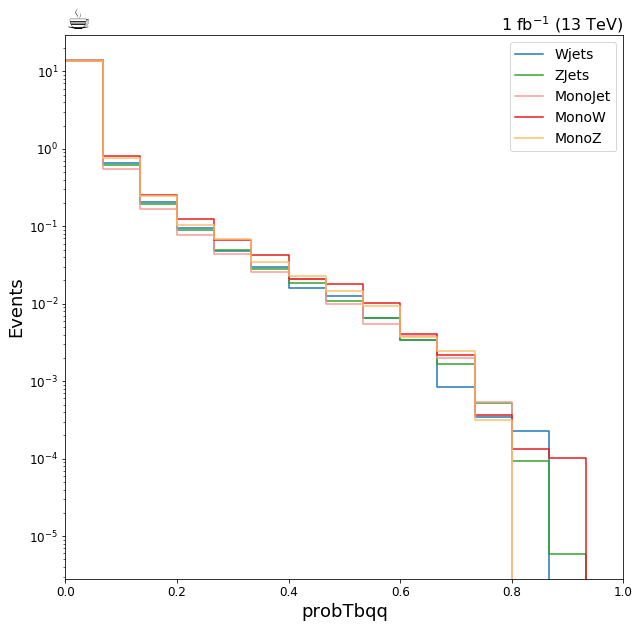

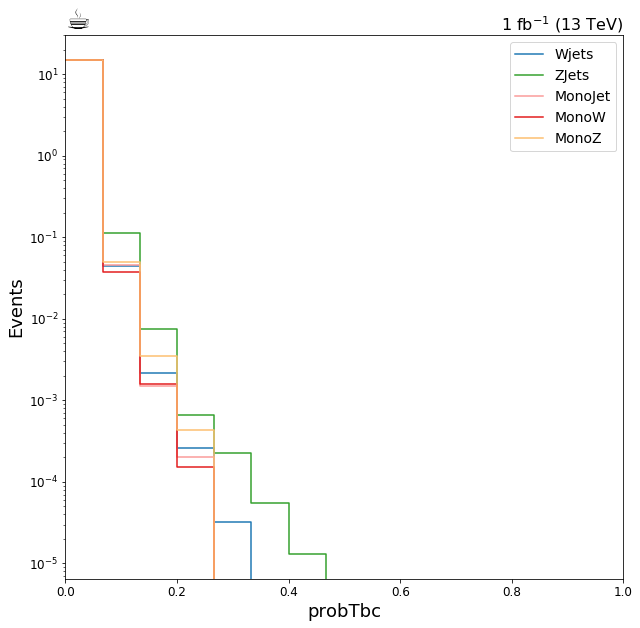

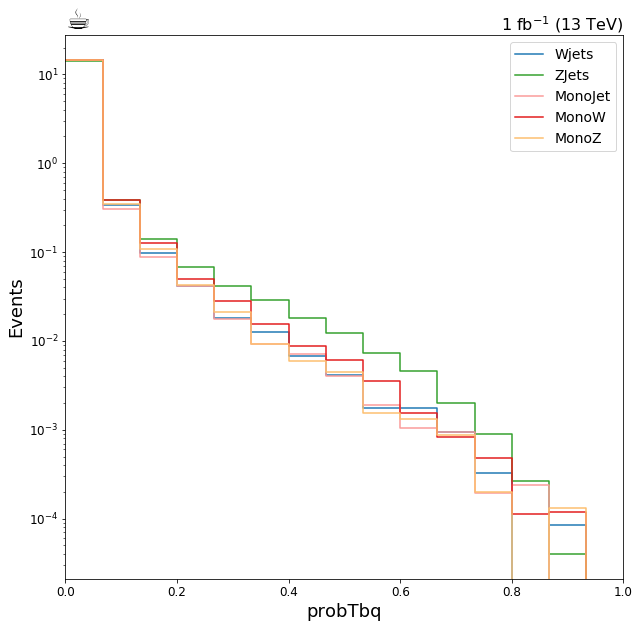

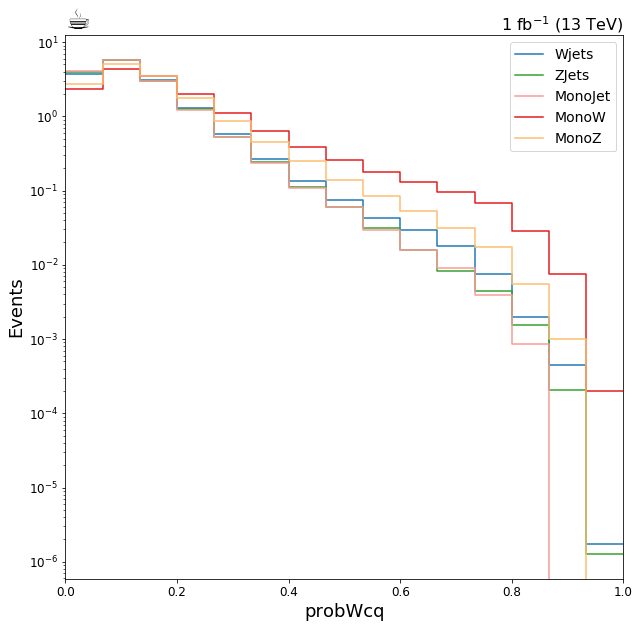

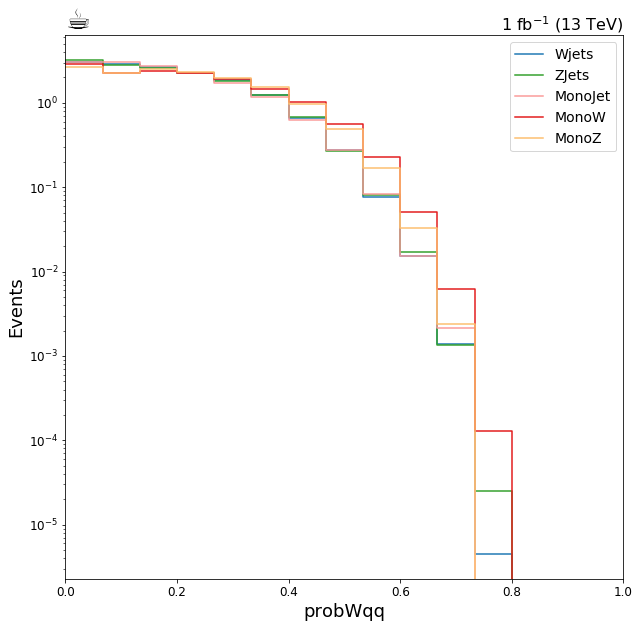

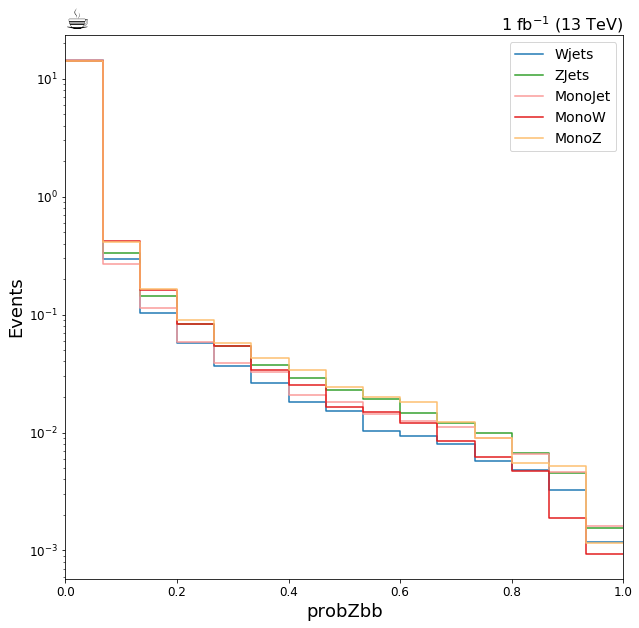

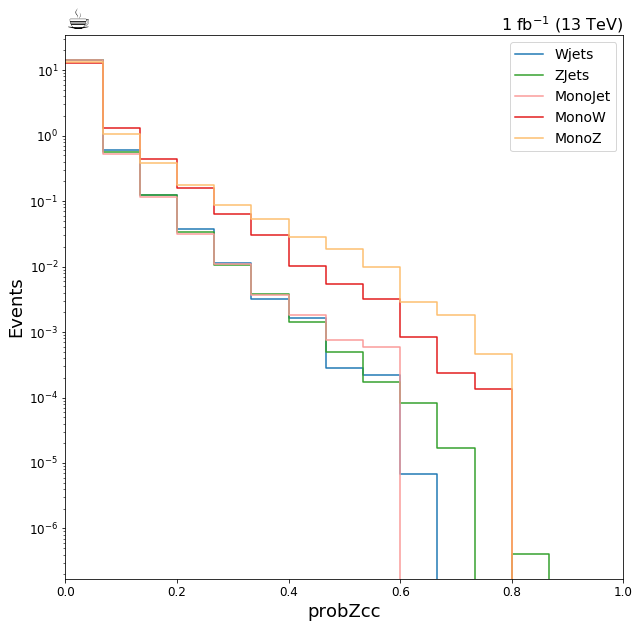

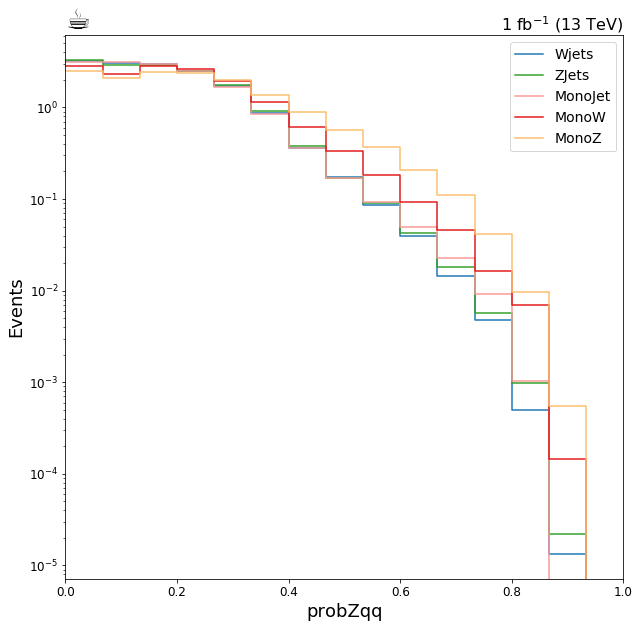

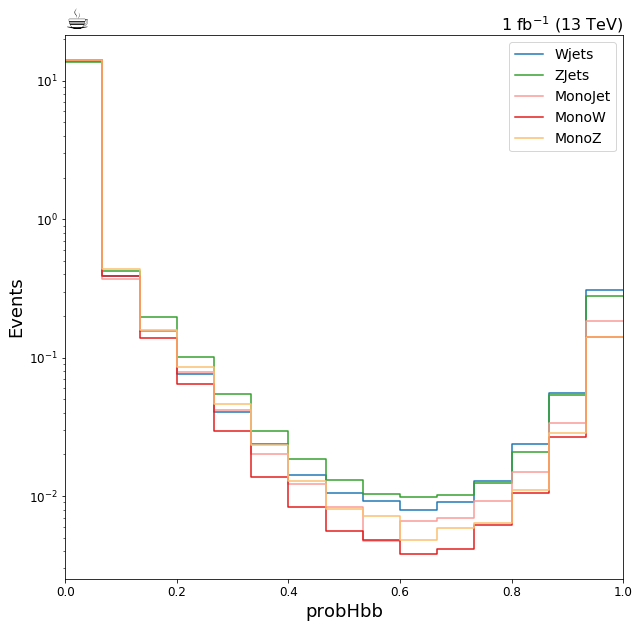

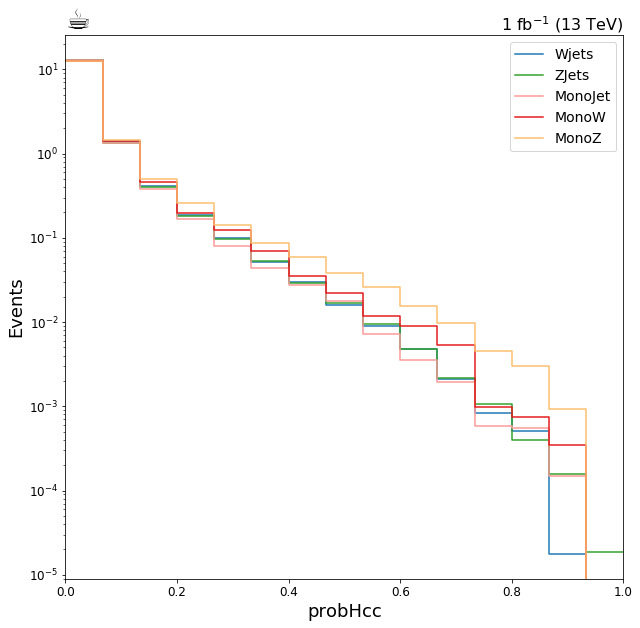

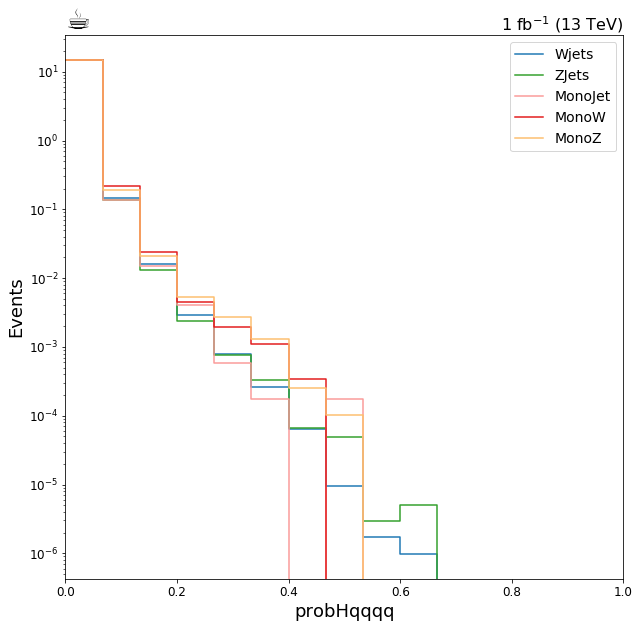

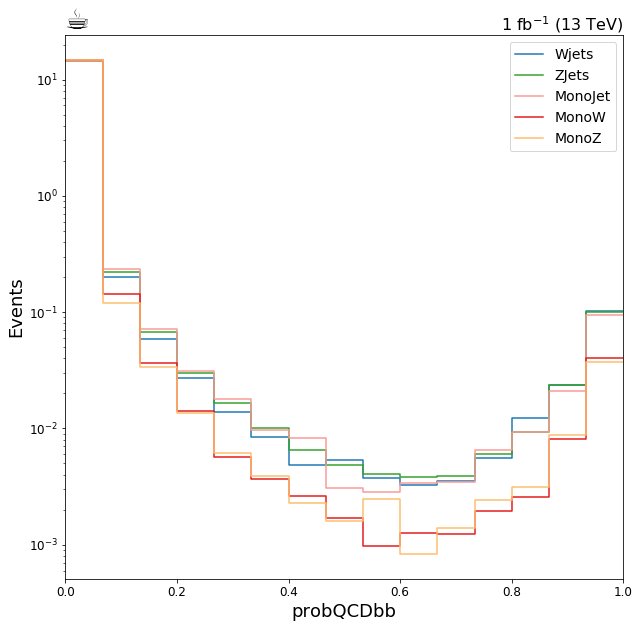

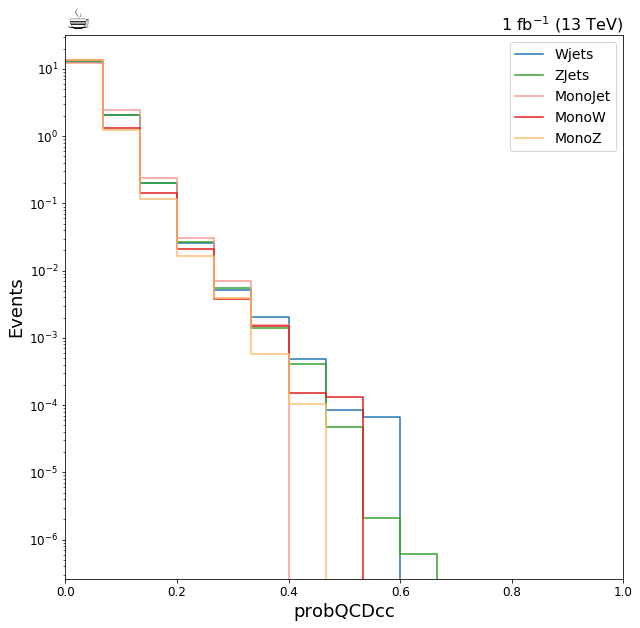

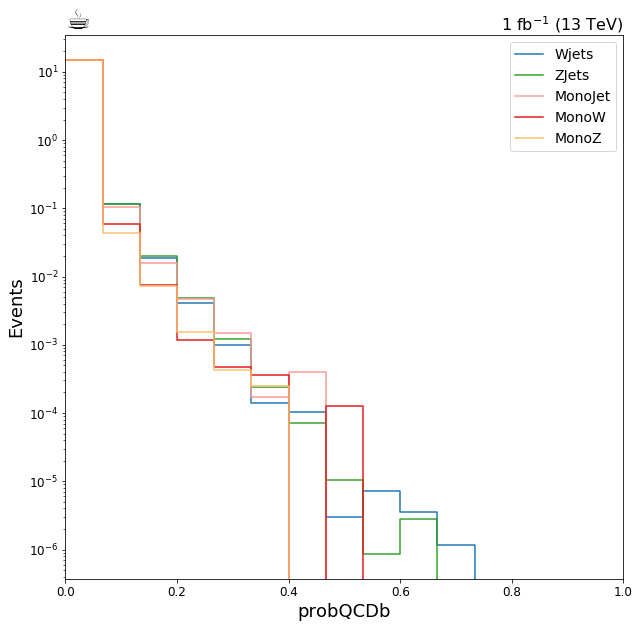

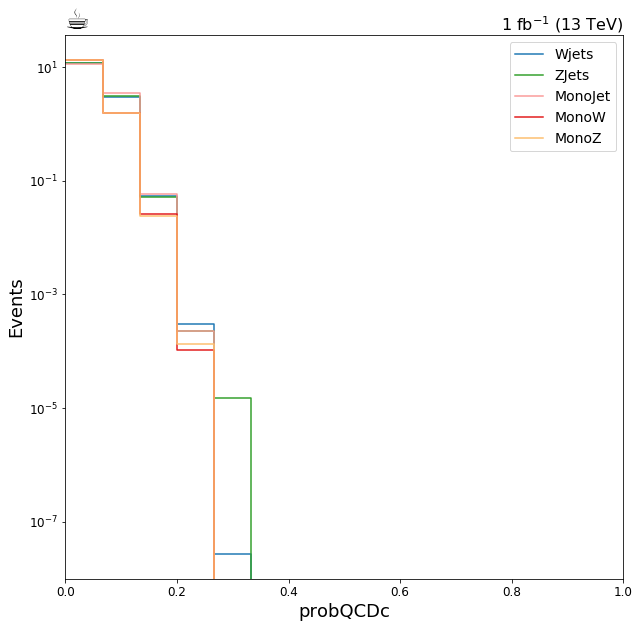

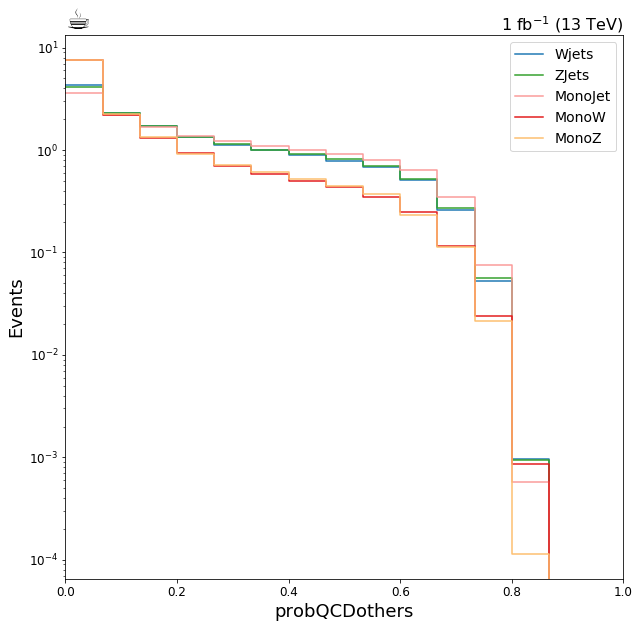

In [6]:
ChannelKeys = ['probTbcq', 'probTbqq', 'probTbc', 'probTbq',
             'probWcq', 'probWqq', 
             'probZbb', 'probZcc', 'probZqq', 
             'probHbb', 'probHcc', 'probHqqqq',
             'probQCDbb', 'probQCDcc', 'probQCDb', 'probQCDc', 'probQCDothers' ]

from cycler import cycler

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
colors = ['#1f78b4','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']

if not os.path.exists('tagger'):
    os.makedirs('tagger')

for key in ChannelKeys:
    
    jet_selection='baggy'
    args = {'linestyle':'--','linewidth':2}
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(hists[key].project('jet_selection',jet_selection).project('region','iszeroL'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
    plot.plot1d(signal_hists[key].project('jet_selection',jet_selection).project('region','iszeroL'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    #ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    plot_path = os.path.abspath('tagger')
    plot_name = 'MC2_'+key+'_'+jet_selection+'.png'
    fig.savefig(os.path.join(plot_path, plot_name))

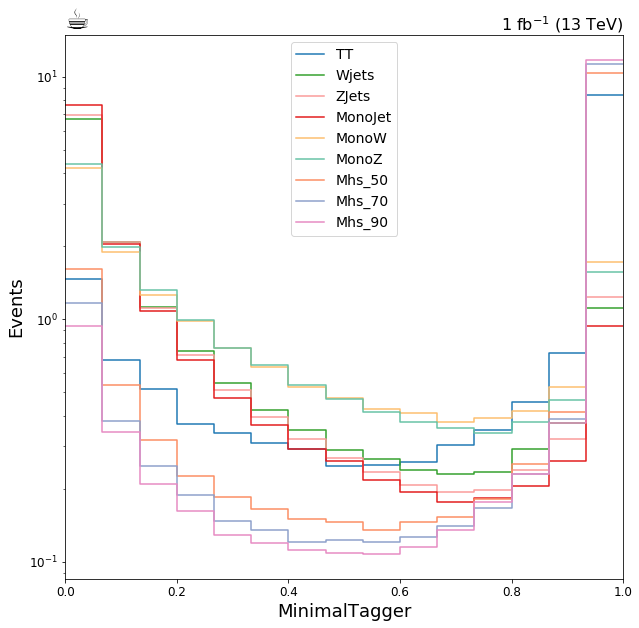

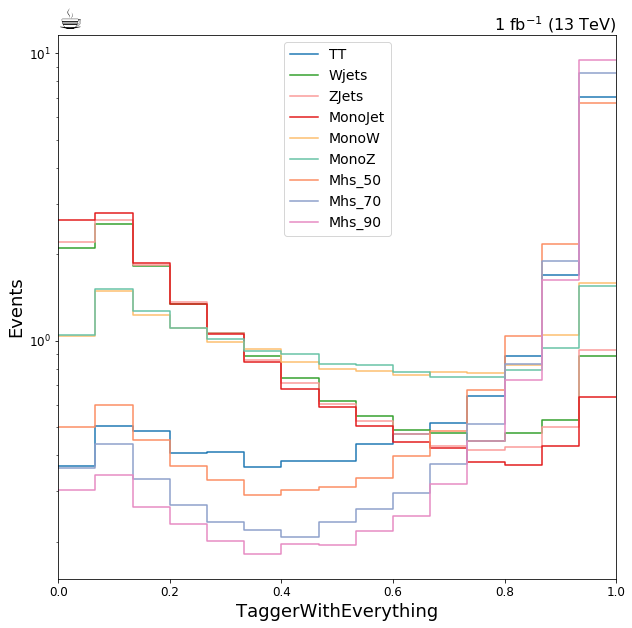

In [9]:
#TaggerKeys=['TopAndDarkHiggsV1', 'TopAndDarkHiggsV2', 'TopAndDarkHiggsV3', 'TopAndDarkHiggsV4', 'MonoJandV']
#TaggerKeys=['MonoJandV']
TaggerKeys=['MinimalTagger','TaggerWithEverything']

from cycler import cycler

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
colors = ['#1f78b4','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']

if not os.path.exists('tagger'):
    os.makedirs('tagger')

for key in TaggerKeys:
    
    jet_selection='baggy'
    args = {'linestyle':'--','linewidth':2}
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(hists[key].project('jet_selection',jet_selection).project('region','iszeroL'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
    plot.plot1d(signal_hists[key].project('jet_selection',jet_selection).project('region','iszeroL'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    #ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    plot_path = os.path.abspath('tagger')
    plot_name = 'MC3_'+key+'_'+jet_selection+'.png'
    fig.savefig(os.path.join(plot_path, plot_name))